In [7]:
import statsmodels.api as stm

In [3]:
import stm.tsa as sts

In [21]:
import numpy as np

In [9]:
?stm.tsa.SVAR

In [13]:
?sts.vector_ar.svar_model.SVAR

In [25]:
mdata = stm.datasets.macrodata.load().data
mdata = mdata[['realgdp','realcons','realinv']]

In [27]:
names = mdata.dtype.names
data = mdata.view((float,3))

/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.16 because this will return a view instead of a copy -- see release notes for details.
  


In [28]:
data = np.diff(np.log(data), axis=0)

In [32]:
?stm.tsa.VAR


### VAR

In [33]:
model = stm.tsa.VAR(data)
res = model.fit(2)

In [34]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Jun, 2019
Time:                     14:41:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001527         0.001119            1.365           0.172
L1.y1        -0.279435         0.169663           -1.647           0.100
L1.y2         0.675016         0.131285            5.142           0.000
L1.y3         0.033219

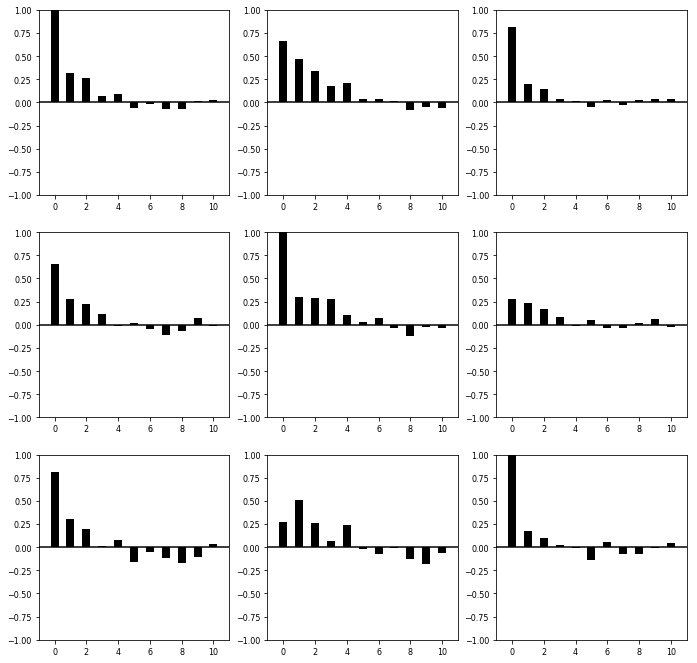

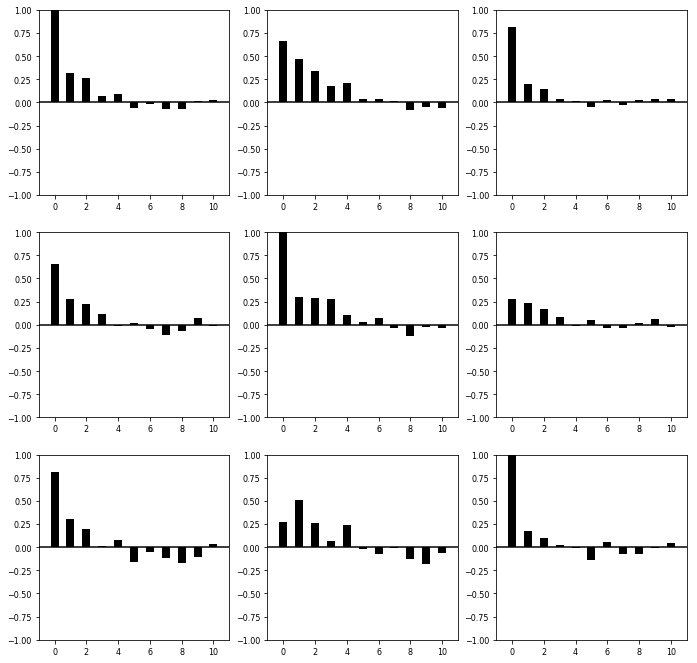

In [35]:
res.plot_sample_acorr()

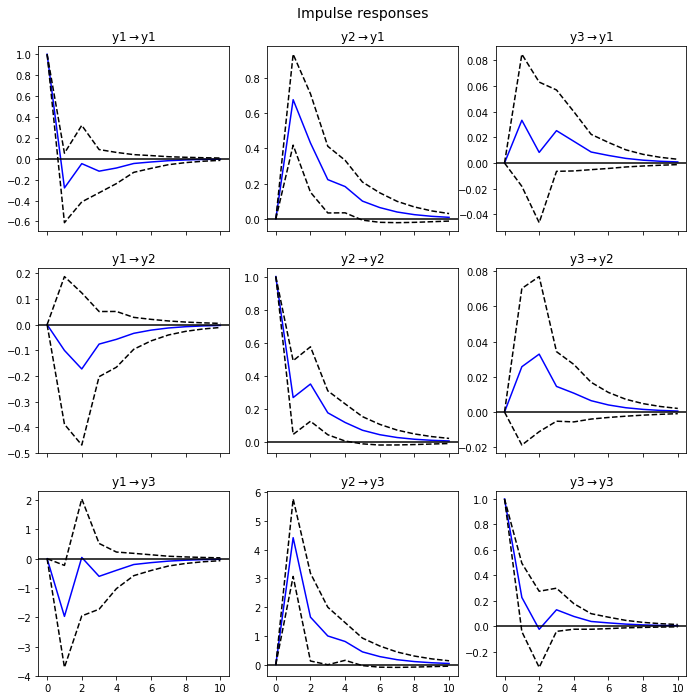

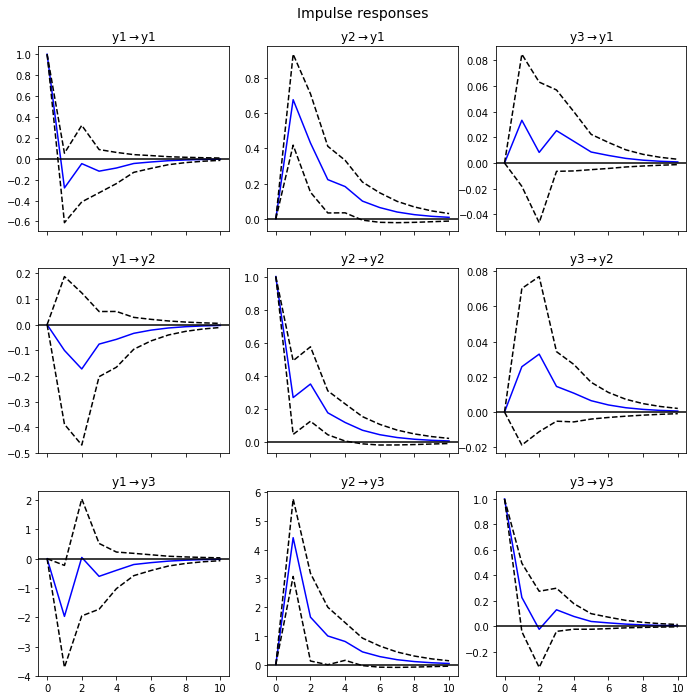

In [36]:
irf = res.irf(10) 
irf.plot()

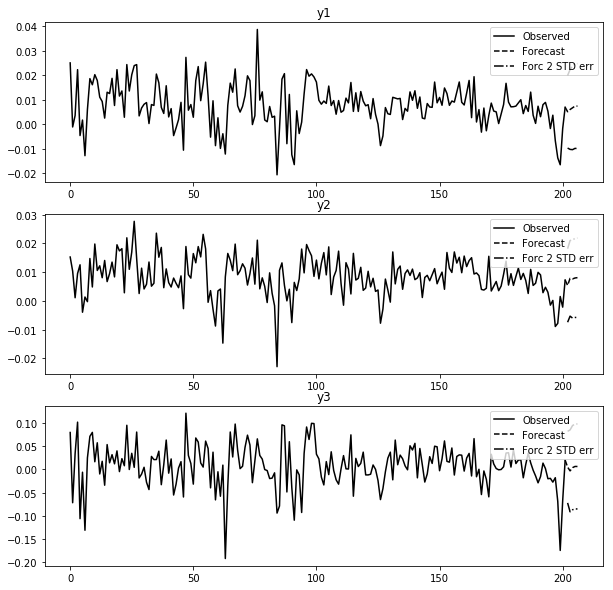

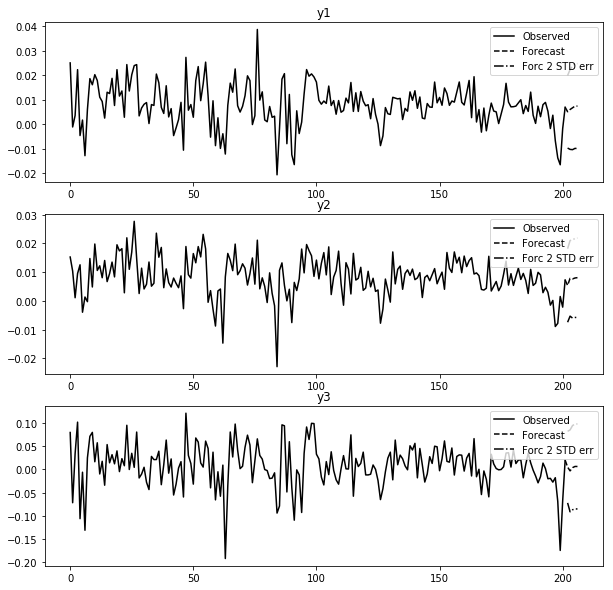

In [37]:
res.plot_forecast(5)

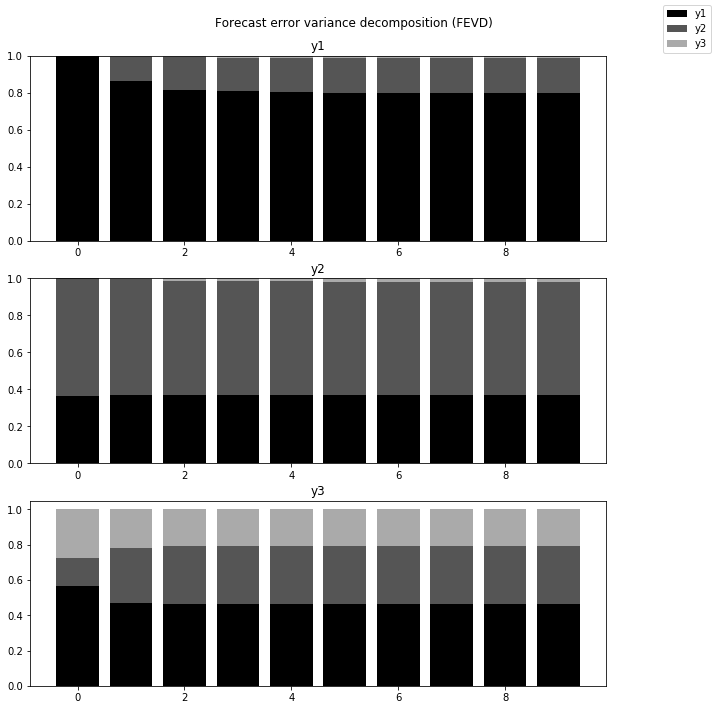

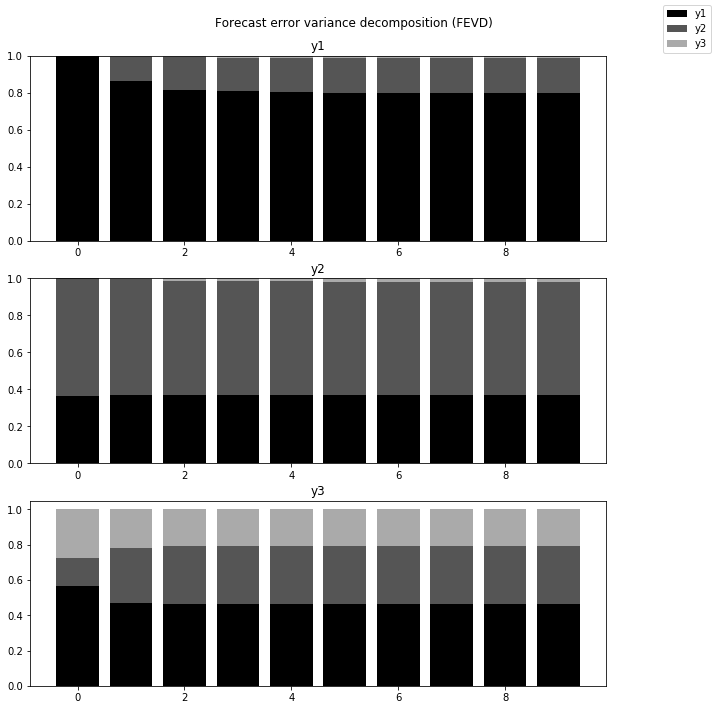

In [38]:
res.fevd().plot()

In [44]:
res.test_causality( 'y2', 'y3').summary()

Test statistic,Critical value,p-value,df
1.378,3.011,0.253,"(2, 579)"


In [45]:
res.test_causality('y3', 'y2').summary()

Test statistic,Critical value,p-value,df
22.53,3.011,0.000,"(2, 579)"


### SVAR

In [47]:
import matplotlib.pyplot as plt

In [49]:
A = np.asarray([[1, 0, 0],['E', 1, 0],['E', 'E', 1]])
B = np.asarray([['E', 0, 0], [0, 'E', 0], [0, 0, 'E']])
A_guess = np.asarray([0.5, 0.25, -0.38])
B_guess = np.asarray([0.5, 0.1, 0.05])

In [51]:
mymodel = stm.tsa.SVAR(data, svar_type='AB', A=A, B=B)

In [ ]:
res = mymodel.fit(maxlags=3, maxiter=10000, maxfun=10000, solver='bfgs')

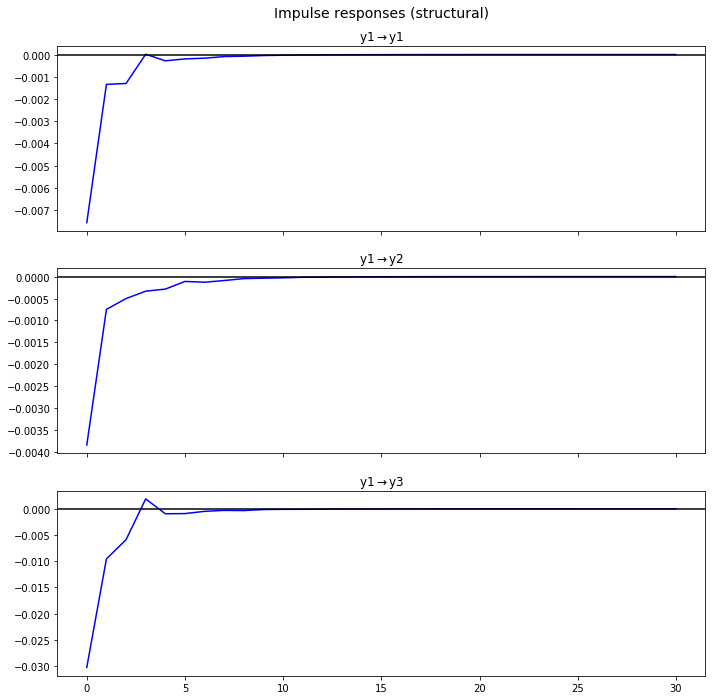

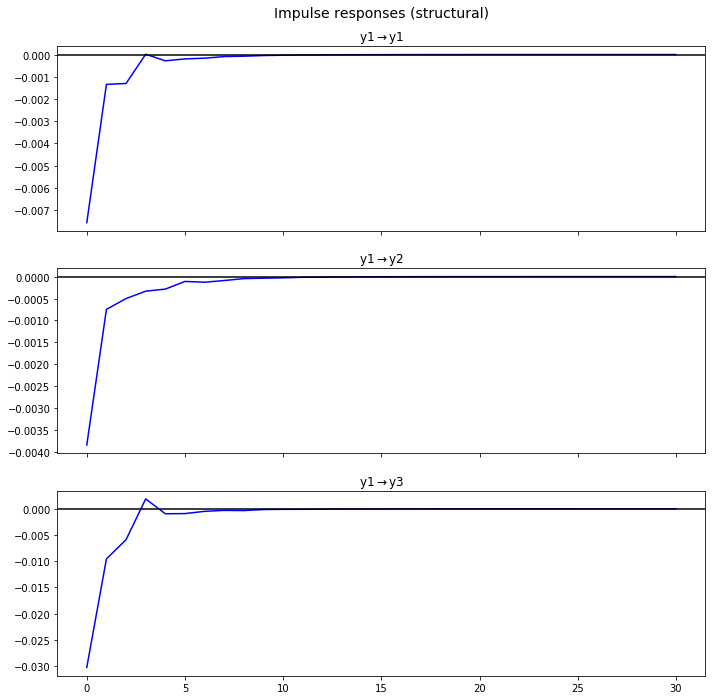

In [53]:
res.irf(periods=30).plot(impulse='y1', plot_stderr=False)